<a href="https://colab.research.google.com/github/Shashi3k/Google_Colab/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
X = df.iloc[:,[3,4]].values

In [9]:
from sklearn.cluster import KMeans
wcss=[]

In [10]:
for i in range(1,11):
  kmeans= KMeans(n_clusters=i,init ="k-means++",random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

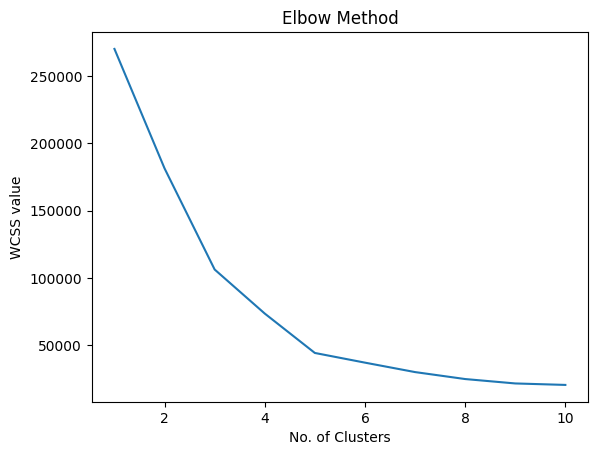

In [11]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS value")
plt.show()

In [12]:
kmeansmodel = KMeans(n_clusters=5,init="k-means++",random_state=0)

In [13]:
y_kmeans=kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


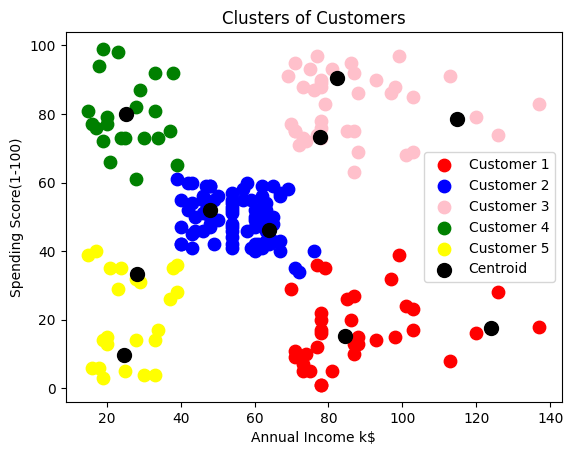

In [16]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c="red",label="Customer 1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c="blue",label="Customer 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c="pink",label="Customer 3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c="green",label="Customer 4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c="yellow",label="Customer 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="Centroid")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()